# Visualizing

야구에서 타구 기록들을 시각화 해보자   
Data = 2018 메이저리그

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 

pd.set_option('display.max_columns', 100)

In [57]:
# 2018 MLB 데이터
MLBAM18 = pd.read_csv("data/MLBAM18.csv")
MLBAM18.drop(['Unnamed: 0'], axis=1, inplace=True)
MLBAM18.head()

,inning,batterId,pitcherId,event,x,y,ab_num,timestamp,stand,throws,runnerMovement,half,balls,strikes,endOuts,actionId,description,game_type,home_team,home_teamId,home_lg,away_team,away_teamId,away_lg,venueId,stadium,field_teamId,playerId.1B,playerId.2B,playerId.3B,playerId.C,playerId.CF,playerId.LF,playerId.RF,playerId.SS,batterPos,batterName,pitcherName,runsOnPlay,startOuts,runsInInning,runsITD,runsFuture,start1B,start2B,start3B,end1B,end2B,end3B,outsInInning,startCode,endCode,fielderId,gameId,isPA,isAB,isHit,isBIP,our.x,our.y,r,theta
0,1,664023,570632,Home Run,233.22,70.48,1,2018-03-29 16:43:11,L,R,[664023:::T:Home Run],top,0,0,0,NaN,Ian Happ homers (1) on a fly ball to right fie...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,CF,"Happ, I",Urena,1,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,True,False,270.081515,320.743636,419.309557,0.870937
1,1,592178,570632,Walk,NaN,NaN,2,2018-03-29 16:43:56,R,R,[592178::1B::Walk],top,4,2,0,NaN,Kris Bryant walks.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,3B,Bryant,Urena,0,0,3,1,2,NaN,NaN,NaN,592178.0,NaN,NaN,3,0,1,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
2,1,519203,570632,Hit By Pitch,NaN,NaN,3,2018-03-29 16:46:24,L,R,[592178:1B:2B::Hit By Pitch][519203::1B::Hit B...,top,1,2,0,NaN,Anthony Rizzo hit by pitch. Kris Bryant to ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,1B,Rizzo,Urena,0,0,3,1,2,592178.0,NaN,NaN,519203.0,592178.0,NaN,3,1,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
3,1,575929,570632,Strikeout,NaN,NaN,4,2018-03-29 16:48:44,R,R,NaN,top,2,3,1,NaN,Willson Contreras strikes out swinging.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,C,Contreras,Urena,0,0,3,1,2,519203.0,592178.0,NaN,519203.0,592178.0,NaN,3,3,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,False,NaN,NaN,NaN,NaN
4,1,656941,570632,Groundout,148.05,164.76,5,2018-03-29 16:52:10,L,R,[519203:1B:2B::Groundout][592178:2B:3B::Ground...,top,2,2,2,NaN,"Kyle Schwarber grounds out, first baseman Just...",R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,LF,Schwarber,Urena,0,1,3,1,2,519203.0,592178.0,NaN,NaN,519203.0,592178.0,3,3,6,571506.0,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,True,57.525216,85.451775,103.010467,0.978292


In [58]:
MLBmap = MLBAM18[['gameId','home_team','away_team','stadium','inning', 'batterId', 'batterName',
                  'pitcherId', 'pitcherName','event','timestamp','stand', 'throws','x','y','our.x','our.y']]
MLBmap.head()

,gameId,home_team,away_team,stadium,inning,batterId,batterName,pitcherId,pitcherName,event,timestamp,stand,throws,x,y,our.x,our.y
0,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,664023,"Happ, I",570632,Urena,Home Run,2018-03-29 16:43:11,L,R,233.22,70.48,270.081515,320.743636
1,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,592178,Bryant,570632,Urena,Walk,2018-03-29 16:43:56,R,R,NaN,NaN,NaN,NaN
2,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,519203,Rizzo,570632,Urena,Hit By Pitch,2018-03-29 16:46:24,L,R,NaN,NaN,NaN,NaN
3,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,575929,Contreras,570632,Urena,Strikeout,2018-03-29 16:48:44,R,R,NaN,NaN,NaN,NaN
4,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,656941,Schwarber,570632,Urena,Groundout,2018-03-29 16:52:10,L,R,148.05,164.76,57.525216,85.451775


In [59]:
MLBmap['event'].unique()

array(['Home Run', 'Walk', 'Hit By Pitch', 'Strikeout', 'Groundout',
       'Single', 'Forceout', 'Lineout', 'Pop Out', 'Double',
       'Intent Walk', 'Grounded Into DP', 'Triple', 'Flyout',
       'Catcher Interference', 'Field Error', 'Sac Bunt', 'Sac Fly',
       'Double Play', 'Fielders Choice Out', 'Runner Out',
       'Strikeout - DP', 'Bunt Groundout', 'Fielders Choice',
       'Bunt Pop Out', 'Batter Interference', 'Bunt Lineout',
       'Fan interference', 'Triple Play', 'Sac Fly DP',
       'Sacrifice Bunt DP'], dtype=object)

(-100.0, 500.0)

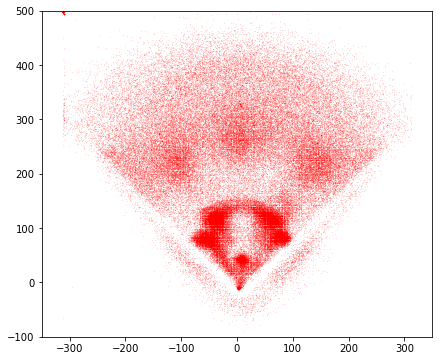

In [68]:
# 전체 타구 분포
plt.figure(figsize=(7,6))
plt.scatter(MLBmap['our.x'],MLBmap['our.y'], s=.01,c='r', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

# 

# HIT

(-100.0, 500.0)

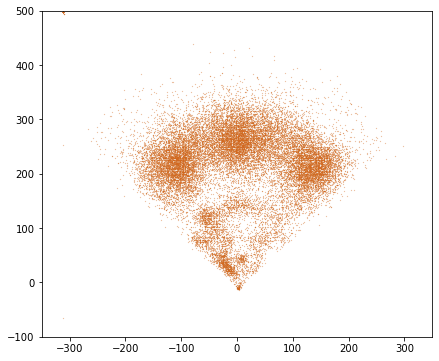

In [67]:
# 1루타
single = MLBmap[MLBmap.event == 'Single']
plt.figure(figsize=(7,6))
plt.scatter(single['our.x'],single['our.y'], s=.1,c='chocolate', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

(-100.0, 500.0)

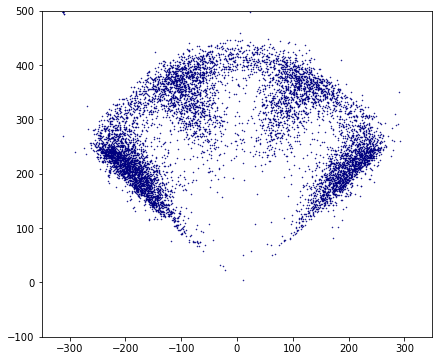

In [69]:
# 2루타
double = MLBmap[MLBmap.event == 'Double']
plt.figure(figsize=(7,6))
plt.scatter(double['our.x'],double['our.y'], s=1,c='navy', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

(-100.0, 500.0)

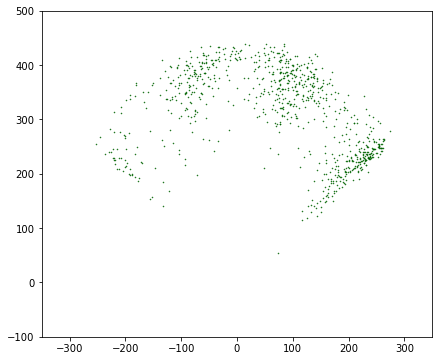

In [70]:
# 3루타
triple = MLBmap[MLBmap.event == 'Triple']
plt.figure(figsize=(7,6))
plt.scatter(triple['our.x'],triple['our.y'], s=1,c='darkgreen', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

(-100.0, 500.0)

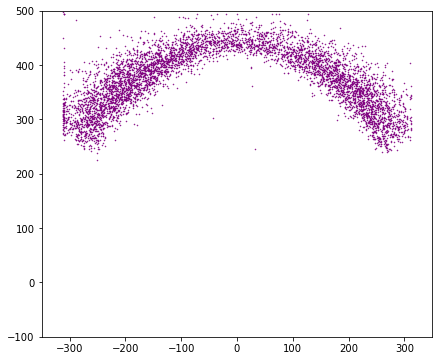

In [71]:
# 홈런
hr = MLBmap[MLBmap.event == 'Home Run']
plt.figure(figsize=(7,6))
plt.scatter(hr['our.x'],hr['our.y'], s=1,c='purple', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

(-100.0, 500.0)

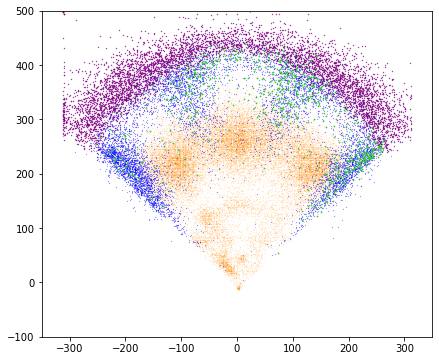

In [73]:
# 모든 H
plt.figure(figsize=(7,6))
plt.scatter(single['our.x'],single['our.y'], s=.01,c='darkorange', marker= '.')
plt.scatter(double['our.x'],double['our.y'], s=.1,c='blue', marker= '.')
plt.scatter(triple['our.x'],triple['our.y'], s=2,c='limegreen', marker= '.')
plt.scatter(hr['our.x'],hr['our.y'], s=.5,c='purple', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

# 

# OUT

(-100.0, 500.0)

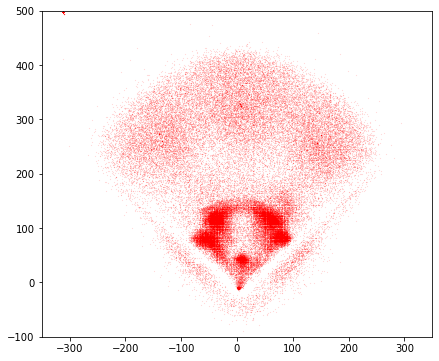

In [74]:
# 모든 outs
Outs = MLBmap[(MLBmap.event == 'Groundout')|(MLBmap.event == 'Flyout')| (MLBmap.event == 'Pop Out')|
             (MLBmap.event == 'Forceout')|(MLBmap.event == 'Lineout')| (MLBmap.event == 'Grounded Into DP')]
plt.figure(figsize=(7,6))
plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

# 

# HIT vs OUT

(-100.0, 500.0)

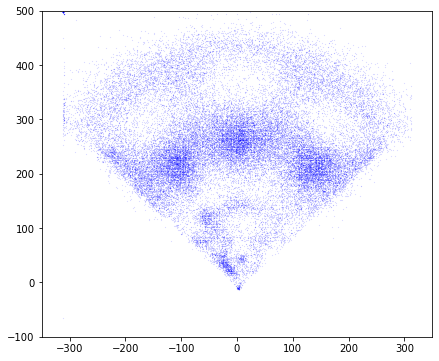

In [76]:
# 모든 HIT
plt.figure(figsize=(7,6))
Hits = MLBmap[(MLBmap.event == 'Single')|(MLBmap.event == 'Double')| (MLBmap.event == 'Triple')|
             (MLBmap.event == 'Home Run')]
plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
plt.xlim(-350,350)
plt.ylim(-100,500)

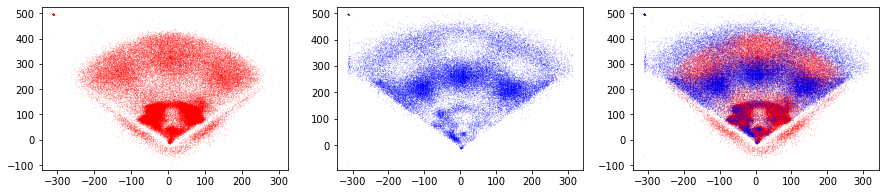

In [77]:
f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax2 = f.add_subplot(132)
ax2 = plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
ax3 = f.add_subplot(133)
ax3=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax3=plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')

# 

# 우타자 vs 좌타자

In [78]:
right = MLBmap[MLBmap['stand']=='R']
left = MLBmap[MLBmap['stand']=='L']

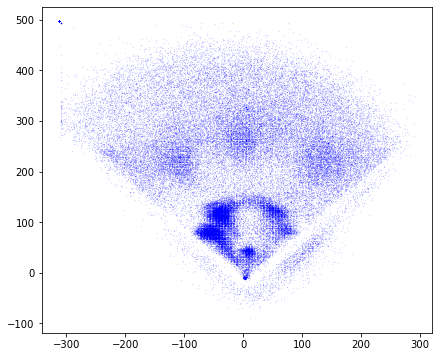

In [80]:
# 우타자
plt.figure(figsize=(7,6))
plt.scatter(right['our.x'],right['our.y'], s=.01,c='b', marker= '.')

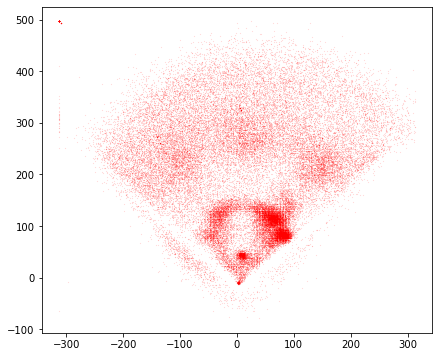

In [79]:
# 좌타자
plt.figure(figsize=(7,6))
plt.scatter(left['our.x'],left['our.y'], s=.01,c='r', marker= '.')